# Triangular Arbitrage - Bitfinex

In [287]:
from bitfinex import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [288]:
class arbitrage_check:
    
    def __init__(self):
        self.starter = Bitfinex_Pub()
        self.base = ["btc", "eth"]
        self.feed = Bitfinex_Pub()
        self.pairs = self.starter.symbols_v2()
    
    def df_clean(self):
        '''Remove unnecessary data and convert into dataframe'''
        pair_snap = ps.read_json(self.starter.tickers(self.pairs))
        pair_snap.columns = ["SYMBOL","BID", "BID_SIZE", "ASK", "ASK_SIZE", "DAILY_CHANGE", "DAILY_CHANGE_PERC", "LAST_PRICE", "VOLUME", "HIGH", "LOW"]
        pair_snap.drop(inplace=True, columns=["DAILY_CHANGE", "DAILY_CHANGE_PERC", "LAST_PRICE", "VOLUME", "HIGH", "LOW"])
        pair_snap = pair_snap.assign(QUOTE_C=pair_snap['SYMBOL'].str[-3:])
        pair_snap = pair_snap.assign(BASE_C=pair_snap['SYMBOL'].str[1:4])
        
        pair_snap.set_index("SYMBOL", inplace=True)
        return pair_snap
    
    def df_analysis(self):
        data = self.df_clean()

        data_ETH = data[data['QUOTE_C'] == "ETH"]
        data_BTC = data[data['QUOTE_C'] == "BTC"]

        data_cross = pd.merge(data_BTC, data_ETH, on='BASE_C')
        data_cross["CROSS_BID"] = data_cross["BID_x"]/data_cross["ASK_y"]
        data_cross["CROSS_ASK"] = data_cross["ASK_x"]/data_cross["BID_y"]
        data_cross["QUOTE_BID"] = data_BTC.at["tETHBTC", 'BID']
        data_cross["QUOTE_BID_SIZE"] = data_BTC.at["tETHBTC", 'BID_SIZE']
        data_cross["QUOTE_ASK"] = data_BTC.at["tETHBTC", 'ASK']
        data_cross["QUOTE_ASK_SIZE"] = data_BTC.at["tETHBTC", 'ASK_SIZE']

        data_cross["Buy_QUOTE"] = (((data_cross["QUOTE_BID"]/data_cross["CROSS_ASK"])-1)*100)-((((1+0.002)**3)*100)-100)
        data_cross["Buy_CROSS"] = (((data_cross["CROSS_BID"]/data_cross["QUOTE_ASK"])-1)*100)-((((1+0.002)**3)*100)-100)
        data_cross.sort_values(by=['Buy_CROSS'])
        data_cross['positive_cross'] = data_cross['Buy_CROSS'] > 0
        data_cross['positive_quote'] = data_cross['Buy_QUOTE'] > 0
        #data_cross["FEE"] = (1+0.002)**3
        return data_cross.sort_values("BASE_C")
            

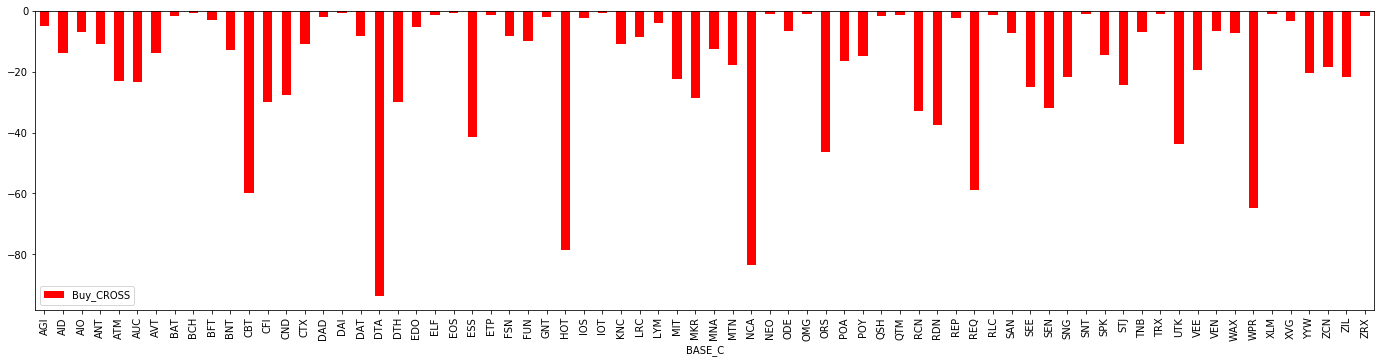

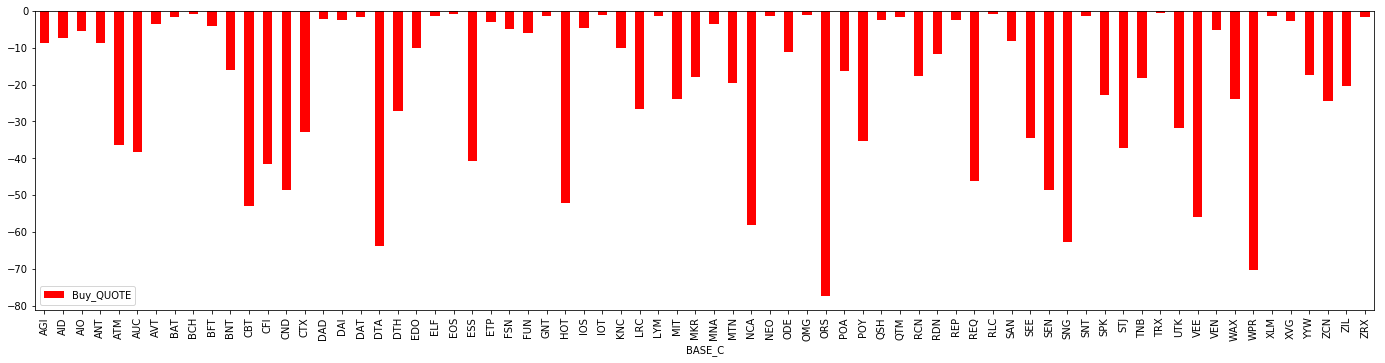

In [289]:
program = arbitrage_check()

data= program.df_analysis()

plots = data.plot.bar(x="BASE_C",y=["Buy_CROSS"],figsize=(24,5.5),color=[data.positive_cross.map({True: 'g', False: 'r'})])
plots = data.plot.bar(x="BASE_C",y=["Buy_QUOTE"],figsize=(24,5.5),color=[data.positive_quote.map({True: 'g', False: 'r'})])


In [290]:
#Descriptive Statistics
data.describe()

,BID_x,BID_SIZE_x,ASK_x,ASK_SIZE_x,BID_y,BID_SIZE_y,ASK_y,ASK_SIZE_y,CROSS_BID,CROSS_ASK,QUOTE_BID,QUOTE_BID_SIZE,QUOTE_ASK,QUOTE_ASK_SIZE,Buy_QUOTE,Buy_CROSS
count,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,7.200000e+01,72.000000,7.200000e+01,72.000000,72.000000,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,72.000000
mean,2.320390e-03,7.745257e+05,2.638930e-03,1.737009e+05,0.042909,6.397979e+05,0.046705,1.411581e+05,0.046972,0.077501,5.669900e-02,3.910202e+02,5.674200e-02,3.107377e+02,-19.550833,-17.819430
std,1.308094e-02,1.940088e+06,1.464596e-02,3.277835e+05,0.239921,1.009677e+06,0.259249,2.603563e+05,0.011776,0.033045,4.192553e-17,4.006963e-13,6.987588e-17,1.144846e-13,20.433575,20.754171
min,3.100000e-07,9.177032e+01,4.900000e-07,2.946383e+01,0.000006,2.500000e+02,0.000011,1.323327e+01,0.004000,0.056634,5.669900e-02,3.910202e+02,5.674200e-02,3.107377e+02,-77.250663,-93.551749
25%,3.552500e-06,6.130291e+04,4.872500e-06,1.307425e+04,0.000070,5.525507e+04,0.000099,7.417271e+03,0.043675,0.057810,5.669900e-02,3.910202e+02,5.674200e-02,3.107377e+02,-33.244696,-23.629225
50%,1.464500e-05,2.518027e+05,1.799500e-05,5.151772e+04,0.000249,1.651730e+05,0.000286,4.579512e+04,0.050956,0.063108,5.669900e-02,3.910202e+02,5.674200e-02,3.107377e+02,-10.753848,-10.798490
75%,8.583000e-05,8.025723e+05,9.684500e-05,1.985248e+05,0.001576,8.909462e+05,0.001682,1.405162e+05,0.055870,0.084186,5.669900e-02,3.910202e+02,5.674200e-02,3.107377e+02,-2.522295,-2.137381
max,9.468100e-02,1.569103e+07,9.474600e-02,1.936748e+06,1.666900,5.983411e+06,1.672800,1.242874e+06,0.056749,0.242817,5.669900e-02,3.910202e+02,5.674200e-02,3.107377e+02,-0.486967,-0.588372


In [291]:
#How to determine trade amount
def arbitrage_amount():
    pass
    # min(ASK_SIZE_Y, BID_SIZE_X,(Q_SIZE_ASK*Q_ASK)/BID_X) least amount of coin to buy. -> buy cross

In [292]:
data

,BID_x,BID_SIZE_x,ASK_x,ASK_SIZE_x,QUOTE_C_x,BASE_C,BID_y,BID_SIZE_y,ASK_y,ASK_SIZE_y,...,CROSS_BID,CROSS_ASK,QUOTE_BID,QUOTE_BID_SIZE,QUOTE_ASK,QUOTE_ASK_SIZE,Buy_QUOTE,Buy_CROSS,positive_cross,positive_quote
36,9.630000e-06,5.499692e+05,1.026000e-05,2.901811e+04,BTC,AGI,0.000166,3.616066e+03,0.000178,3.697000e+03,...,0.054162,0.061733,0.056699,391.020231,0.056742,310.737723,-8.755452,-5.148133,False,False
24,1.173000e-05,5.005713e+05,1.346000e-05,3.325118e+04,BTC,AID,0.000221,1.127720e+05,0.000238,4.186234e+04,...,0.049269,0.060897,0.056699,391.020231,0.056742,310.737723,-7.494366,-13.771069,False,False
29,7.675000e-05,4.942080e+04,8.297000e-05,8.775737e+03,BTC,AIO,0.001390,1.207019e+04,0.001445,4.482665e+03,...,0.053125,0.059691,0.056699,391.020231,0.056742,310.737723,-5.613121,-6.975286,False,False
40,1.965100e-04,3.819350e+04,2.197200e-04,6.358494e+03,BTC,ANT,0.003555,2.500000e+02,0.003860,1.746966e+03,...,0.050912,0.061806,0.056699,391.020231,0.056742,310.737723,-8.864015,-10.875840,False,False
66,2.620000e-06,1.239138e+06,4.480000e-06,2.513874e+05,BTC,ATM,0.000051,5.690053e+05,0.000059,5.545874e+05,...,0.044041,0.088154,0.056699,391.020231,0.056742,310.737723,-36.283273,-22.984946,False,False
55,1.315000e-05,8.993990e+04,2.099000e-05,2.399357e+04,BTC,AUC,0.000231,7.344867e+05,0.000300,1.672756e+05,...,0.043833,0.090866,0.056699,391.020231,0.056742,310.737723,-38.202587,-23.350957,False,False
8,8.892000e-05,4.120755e+04,9.800000e-05,8.277798e+03,BTC,AVT,0.001678,7.643445e+03,0.001810,1.114845e+03,...,0.049135,0.058413,0.056699,391.020231,0.056742,310.737723,-3.535984,-14.007116,False,False
15,3.700000e-05,6.900802e+04,3.743000e-05,6.496918e+04,BTC,BAT,0.000653,3.334858e+04,0.000659,8.242724e+04,...,0.056153,0.057282,0.056699,391.020231,0.056742,310.737723,-1.619562,-1.638626,False,False
4,9.468100e-02,9.177032e+01,9.474600e-02,1.332149e+02,BTC,BCH,1.666900,3.285609e+02,1.672800,3.253449e+02,...,0.056600,0.056840,0.056699,391.020231,0.056742,310.737723,-0.848638,-0.850909,False,False
37,8.920000e-06,3.641496e+05,9.250000e-06,2.067302e+05,BTC,BFT,0.000157,1.682054e+06,0.000161,1.435309e+05,...,0.055380,0.058745,0.056699,391.020231,0.056742,310.737723,-4.084179,-3.002158,False,False
